In [ ]:
from typing import List, Tuple, Any
from datetime import datetime

In [ ]:
def get_unix( date, time ):
    format_date = "%d/%m/%Y"
    format_time = "%H:%M:%S.%f000"
    date_obj = datetime.strptime( date, format_date)
    time_obj = datetime.strptime( time, format_time)
    almost = datetime.combine( date_obj.date( ), time_obj.time( ) )
    return ( almost.timestamp( ) )

class Tick:
  def __init__( self, line: List[ int ] ) -> None:
    splitted_line = line.split( ',' )
    self.date = splitted_line[ 0 ]
    self.time = splitted_line[ 1 ]
    self.bid = splitted_line[ 2 ]
    self.ask = splitted_line[ 4 ]
    #self.bid_volume = splitted_line[ 3 ]
    #self.ask_volume = splitted_line[ 5 ]
    self.unix_code = get_unix( splitted_line[ 0 ], splitted_line[ 1 ] )

class Strategy:
    def __init__(self) -> None:
      pass
    def Von_Neuman( self, prices, cant_part, tres_hold) -> int :
        # (tick_list: List[Any] , unix_limit_1: float, unix_limit_2: float , bid_or_ask: str,cant_part: int, tres_hold: float) -> Tuple:
      up_down= []
      #CAMBIO PARA AJUSTARLO AL LARGO DE LA LISTA DE VALORES NUMERICOS UTILES
      if cant_part<len(prices):
          for index_groups in range(cant_part-1):
              try:
                  if prices[index_groups*10]<prices[(index_groups+1)*10]:
                      up_down.append(1)
                  elif (prices[index_groups*10]>prices[(index_groups+1)*10]):
                      up_down.append(-1)
                  else:
                      up_down.append(0)
              except IndexError:
                  up_down.append(0)
          try:
              avg = sum(up_down)/len(up_down)
              if (avg>=-tres_hold) and (avg<=tres_hold):
                  return 0
              elif avg>0 :
                  return -1
              else:
                  return 1
          except ZeroDivisionError:
              return 2
      else:
          return 0
def period_action(p, Tick_list, path):
    aux = []
    with open(path,'a') as file_for_executing:
      for index, value in enumerate(Tick_list):
          if int(value.time[3:5])%p == 0  and not(value.time[:2]=="00" and value.time[3:5] == "00") and not(value.time[:5] in aux):
            file_for_executing.writelines(f"{value.unix_code}, {value.time[:5]}, {value.bid}, {value.ask} \n")
            aux.append(value.time[:5])
      return path

Tick_list = []
with open ('31-05-2023.txt','r') as file:
  for line in file:
    Tick_list.append(Tick(line))

path_2 = 'execution_time.txt'
################################################3
action_p = period_action(15, Tick_list, path_2)#3
################################################3

def commit_by_sell(Tick_list, path_2):
  strat = Strategy()
  path_3 = 'buy_sell_committed.txt'
  id = 0
  with open (path_3,'a') as bs :
    with open (path_2,'r') as file_2:
      file_2 = file_2.readlines()
      ext_file_2 = []
      for value in file_2 :
        ext_file_2.append(value.split(","))
    before = 0
    for value_1 in ext_file_2:
      prices = []
      for value_2 in Tick_list:
        if value_2.unix_code < float(value_1[0]) and float(value_2.unix_code) > before:
          prices.append(value_2.bid)
      before = float(value_1[0])

      buy_sell = strat.Von_Neuman(prices, 4, 0.3)
      if buy_sell == 1 and id != 0:
          bs.writelines(f"{id}, sell, {value_1[2]}, {value_1[3]}")
          id += 1
      if buy_sell == -1:
          bs.writelines(f"{id}, buy, {value_1[2]}, {value_1[3]}")
          id += 1
  return path_3
path_3 = commit_by_sell(Tick_list, path_2)

def reports(path_3):
  path_4 = "reports_PL.txt"
  with open ('buy_sell_committed.txt','r') as file_1:
    file_1 =file_1.readlines()
    with open(path_4,'a') as written_file :
      for index_11, value_11  in enumerate(file_1):
        P_L=0
        splitted_line_0 =  value_11.split(",")
        end_bid = float(splitted_line_0[2])
        end_ask = float(splitted_line_0[3])
        for index_1, value_1 in enumerate(file_1) :
            if (int(splitted_line_0[0])>0) :
                  splitted_line = value_1.split(",")
                  if len(splitted_line)>0 :
                    decision= (splitted_line[1])
                    entry_bid = float(splitted_line[2])
                    entry_ask = float(splitted_line[3])
                    profit = 0
                    if decision.strip() == "buy":
                        profit = entry_bid - end_ask
                    elif decision.strip() == "sell":
                        profit = end_bid - entry_ask
                    P_L += profit
        if splitted_line_0[0].strip() == "0":
            splitted_line = file_1[0].split(",")
            if splitted_line[1].strip() == "buy":
                written_file.writelines(f"{splitted_line_0[0]}, {splitted_line_0[1]}, {splitted_line_0[2]}, {splitted_line_0[3]}, -{splitted_line_0[2]}\n")
            else:
                written_file.writelines(f"{splitted_line_0[0]}, {splitted_line_0[1]}, {splitted_line_0[2]}, {splitted_line_0[3]}\n")
        else:
            written_file.writelines(f"{splitted_line_0[0]}, {splitted_line_0[1]}, {splitted_line_0[2]}, {splitted_line_0[3]}, {str(P_L)[:8]}\n")
  return path_4
path_4 = reports(path_3)




NameError: name 'List' is not defined

In [ ]:
with open("reports_PL.txt","r") as file:
  file = file.readlines()
  print(file[len(file)-2:])

['31,  buy,   1.06970,   1.06980 \n', ', -0.01099\n']


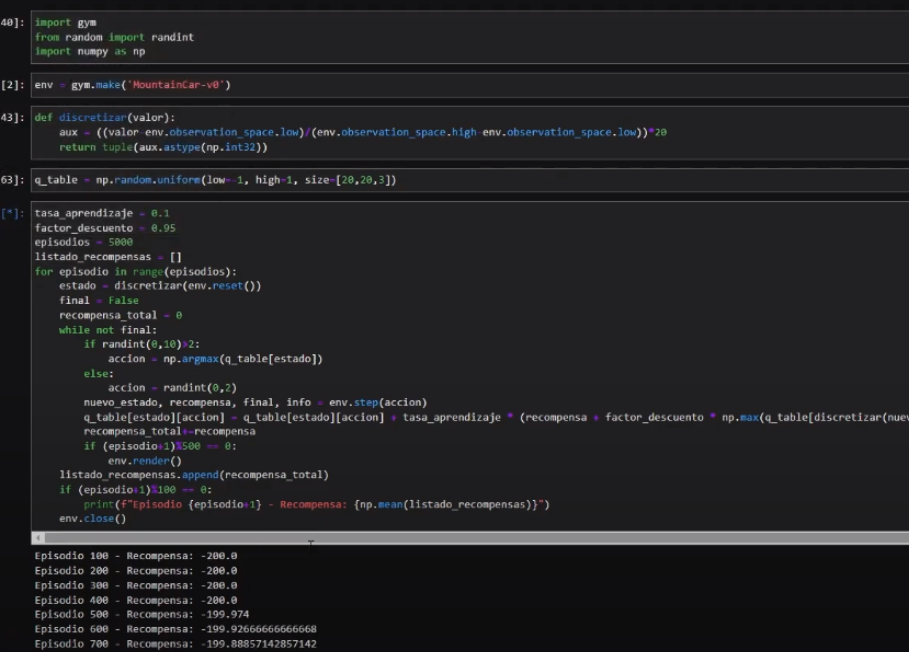### O U T _ HELP


In [ ]:
def get_unix( date, time ):
    format_date = "%d/%m/%Y"
    format_time = "%H:%M:%S.%f000"
    date_obj = datetime.strptime( date, format_date)
    time_obj = datetime.strptime( time, format_time)
    almost = datetime.combine( date_obj.date( ), time_obj.time( ) )
    return ( almost.timestamp( ) )

class Tick:
  def __init__( self, line: List[ int ] ) -> None:
    splitted_line = line.split( ',' )
    self.date = splitted_line[ 0 ]
    self.time = splitted_line[ 1 ]
    self.bid = splitted_line[ 2 ]
    self.ask = splitted_line[ 4 ]
    #self.bid_volume = splitted_line[ 3 ]
    #self.ask_volume = splitted_line[ 5 ]
    self.unix_code = get_unix( splitted_line[ 0 ], splitted_line[ 1 ] )

class Strategy:
    def __init__(self) -> None:
      pass
    def Von_Neuman( self, prices, cant_part, tres_hold ) -> int :
        #tick_list: List[Any] , unix_limit_1: float, unix_limit_2: float , bid_or_ask: str,cant_part: int, tres_hold: float) -> Tuple:
      up_down = [ ]
      #CAMBIO PARA AJUSTARLO AL LARGO DE LA LISTA DE VALORES NUMERICOS UTILES
      if cant_part < len( prices ):
          for index_groups in range( cant_part - 1 ) :
              try:
                  if prices[ index_groups * 10 ] < prices[ ( index_groups + 1 ) * 10 ] :
                      up_down.append( 1 )
                  elif ( prices[ index_groups * 10 ] > prices[ ( index_groups + 1 ) * 10 ] ) :
                      up_down.append( -1 )
                  else :
                      up_down.append( 0 )
              except IndexError :
                  up_down.append( 0 )
          try:
              avg = sum( up_down )/len( up_down )
              if ( avg >= -tres_hold ) and ( avg<=tres_hold ) :
                  return 0
              elif avg > 0 :
                  return -1
              else:
                  return 1
          except ZeroDivisionError:
              return 2
      else:
          return 0
def period_action( p, Tick_list, path ) :
    aux = [ ]
    with open( path, 'a' ) as file_for_executing :
      for index, value in enumerate( Tick_list ) :
          if int( value.time[ 3 : 5 ] ) % p == 0  and not( value.time[ : 2 ] ==  "00" and value.time[ 3 : 5 ] == "00" ) and not( value.time[ : 5 ] in aux ) :
            file_for_executing.writelines( f"{ value.unix_code }, { value.time[ : 5 ] }, { value.bid }, { value.ask } \n")
            aux.append( value.time[ : 5 ] )
      return path

Tick_list = [ ]
with open ( '31-05-2023.txt', 'r' ) as file :
  for line in file:
    Tick_list.append( Tick( line ) )

path_2 = 'execution_time.txt'
################################################3
action_p = period_action( 15, Tick_list, path_2 )#3
################################################3

def commit_by_sell( Tick_list, path_2, cant_part, tres_hold ) :
  strat = Strategy( )
  path_3 = str( cant_part )+'_'+str( tres_hold )+'_'+'buy_sell_committed.txt'
  id = 0
  with open ( path_3, 'a' ) as bs :
    with open ( path_2, 'r' ) as file_2:
      file_2 = file_2.readlines( )
      ext_file_2 = [ ]
      for value in file_2 :
        ext_file_2.append( value.split( "," ) )
    before = 0
    for value_1 in ext_file_2:
      prices = [ ]
      for value_2 in Tick_list:
        if value_2.unix_code < float( value_1[ 0 ] ) and float( value_2.unix_code ) > before :
          prices.append( value_2.bid )
      before = float( value_1[ 0 ] )

      buy_sell = strat.Von_Neuman( prices, cant_part, tres_hold )
      if buy_sell == 1 and id != 0:
          bs.writelines( f"{ id }, sell, { value_1[ 2 ] }, { value_1[ 3 ] }" )
          id += 1
      if buy_sell == -1:
          bs.writelines(f"{ id }, buy, { value_1[ 2 ] }, { value_1[ 3 ] }")
          id += 1
  return path_3


def reports( path_3 ) :
  path_4 = path_3[ : 5 ]+"reports_PL.txt"
  with open ( path_3, 'r' ) as file_1:
    file_1 =file_1.readlines( )
    with open( path_4,'a' ) as written_file :
      for index_11, value_11 in enumerate( file_1 ) :
        P_L=0
        splitted_line_0 =  value_11.split( "," )
        end_bid = float( splitted_line_0[ 2 ] )
        end_ask = float( splitted_line_0[ 3 ] )
        for index_1, value_1 in enumerate( file_1 ) :
            if (int(splitted_line_0[0]) > 0 ) :
                  splitted_line = value_1.split(",")
                  if len(splitted_line)>0 :
                    decision= (splitted_line[1])
                    entry_bid = float(splitted_line[2])
                    entry_ask = float(splitted_line[3])
                    profit = 0
                    if decision.strip() == "buy":
                        profit = entry_bid - end_ask
                    elif decision.strip() == "sell":
                        profit = end_bid - entry_ask
                    P_L += profit
        if splitted_line_0[0].strip() == "0":
            splitted_line = file_1[0].split(",")
            if splitted_line[1].strip() == "buy":
                written_file.writelines(f"{splitted_line_0[0]}, {splitted_line_0[1]}, {splitted_line_0[2]}, {splitted_line_0[3]}, -{splitted_line_0[2]}\n")
            else:
                written_file.writelines(f"{splitted_line_0[0]}, {splitted_line_0[1]}, {splitted_line_0[2]}, {splitted_line_0[3]}\n")
        else:
            written_file.writelines(f"{splitted_line_0[0]}, {splitted_line_0[1]}, {splitted_line_0[2]}, {splitted_line_0[3]}, {str(P_L)[:8]}\n")
  return path_4
for cant_part in range(2,10):
  for tres_hold in [ 0.1, 0.2, 0.3, 0.4, 0.5 ]:
    path_3 = commit_by_sell( Tick_list, path_2, cant_part, tres_hold)
    path_4 = reports( path_3 )
    print(tres_hold, cant_part)



0.1 2
0.2 2
0.3 2
0.4 2
0.5 2
0.1 3
0.2 3
0.3 3
0.4 3
0.5 3
0.1 4
0.2 4
0.3 4
0.4 4
0.5 4
0.1 5
0.2 5
0.3 5
0.4 5
0.5 5
0.1 6
0.2 6
0.3 6
0.4 6
0.5 6
0.1 7
0.2 7
0.3 7
0.4 7
0.5 7
0.1 8
0.2 8
0.3 8
0.4 8
0.5 8
0.1 9
0.2 9
0.3 9
0.4 9
0.5 9


##Tercer testeo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
import os
# Ruta a la carpeta en tu Google Drive
ruta_a_carpeta = '/content/drive/My Drive/txt_trading'

# Listar archivos en la carpeta
archivos_en_carpeta = os.listdir(ruta_a_carpeta)

# Iterar sobre los archivos en la carpeta
for nombre_archivo in archivos_en_carpeta:
    if nombre_archivo.endswith('.txt'):
        ruta_al_archivo = os.path.join(ruta_a_carpeta, nombre_archivo)
        print(ruta_al_archivo[36:len(ruta_al_archivo)-4])

20-01-2023
22-01-2023
23-01-2023
24-01-2023
25-01-2023
26-01-2023
27-01-2023
30-01-2023
31-01-2023
21-02-2023
23-02-2023
24-02-2023
27-02-2023


In [ ]:
from google.colab import drive
import os

# Montar Google Drive
drive.mount('/content/drive')

# Ruta a la carpeta en tu Google Drive
ruta_a_carpeta = '/content/drive/My Drive/txt_trading'

# Listar archivos en la carpeta
archivos_en_carpeta = os.listdir(ruta_a_carpeta)

# Iterar sobre los archivos en la carpeta
with open("analysis.txt",'a') as final_file_for_analysis :
  for nombre_archivo in archivos_en_carpeta:
      if nombre_archivo.endswith('.txt'):
          ruta_al_archivo = os.path.join(ruta_a_carpeta, nombre_archivo)

  #
          for period in [15,20,25,30,25,40,45,50,55]:
            print(period, ruta_al_archivo)
            def get_unix( date, time ):
                format_date = "%d/%m/%Y"
                format_time = "%H:%M:%S.%f000"
                date_obj = datetime.strptime( date, format_date)
                time_obj = datetime.strptime( time, format_time)
                almost = datetime.combine( date_obj.date( ), time_obj.time( ) )
                return ( almost.timestamp( ) )

            class Tick:
              def __init__( self, line: List[ int ] ) -> None:
                splitted_line = line.split( ',' )
                self.date = splitted_line[ 0 ]
                self.time = splitted_line[ 1 ]
                self.bid = splitted_line[ 2 ]
                self.ask = splitted_line[ 4 ]
                #self.bid_volume = splitted_line[ 3 ]
                #self.ask_volume = splitted_line[ 5 ]
                self.unix_code = get_unix( splitted_line[ 0 ], splitted_line[ 1 ] )

            class Strategy:
                def __init__(self) -> None:
                  pass
                def Von_Neuman( self, prices, cant_part, tres_hold ) -> int :
                    #tick_list: List[Any] , unix_limit_1: float, unix_limit_2: float , bid_or_ask: str,cant_part: int, tres_hold: float) -> Tuple:
                  up_down = [ ]
                  #CAMBIO PARA AJUSTARLO AL LARGO DE LA LISTA DE VALORES NUMERICOS UTILES
                  if cant_part < len( prices ):
                      for index_groups in range( cant_part - 1 ) :
                          try:
                              if prices[ index_groups * 10 ] < prices[ ( index_groups + 1 ) * 10 ] :
                                  up_down.append( 1 )
                              elif ( prices[ index_groups * 10 ] > prices[ ( index_groups + 1 ) * 10 ] ) :
                                  up_down.append( -1 )
                              else :
                                  up_down.append( 0 )
                          except IndexError :
                              up_down.append( 0 )
                      try:
                          avg = sum( up_down )/len( up_down )
                          if ( avg >= -tres_hold ) and ( avg<=tres_hold ) :
                              return 0
                          elif avg > 0 :
                              return -1
                          else:
                              return 1
                      except ZeroDivisionError:
                          return 2
                  else:
                      return 0
            def period_action( p, Tick_list, path ) :
                aux = [ ]
                with open( path, 'a' ) as file_for_executing :
                  for index, value in enumerate( Tick_list ) :
                      if int( value.time[ 3 : 5 ] ) % p == 0  and not( value.time[ : 2 ] ==  "00" and value.time[ 3 : 5 ] == "00" ) and not( value.time[ : 5 ] in aux ) :
                        file_for_executing.writelines( f"{ value.unix_code }, { value.time[ : 5 ] }, { value.bid }, { value.ask } \n")
                        aux.append( value.time[ : 5 ] )
                  return path

            Tick_list = [ ]
            with open ( ruta_al_archivo, 'r' ) as file :
              for line in file:
                Tick_list.append( Tick( line ) )

            path_2 = f'execution_time: {period}.txt'
            ################################################3
            action_p = period_action( period, Tick_list, path_2 )#3
            ################################################3

            def commit_by_sell( period, Tick_list,path_1, path_2, cant_part, tres_hold ) :
              strat = Strategy( )
              path_3 = str(period)+' : '+path_1+'_'+str( cant_part )+'_'+str( tres_hold )+'_'+'buy_sell_committed.txt'
              id = 0
              with open ( path_3, 'a' ) as bs :
                with open ( path_2, 'r' ) as file_2:
                  file_2 = file_2.readlines( )
                  ext_file_2 = [ ]
                  for value in file_2 :
                    ext_file_2.append( value.split( "," ) )
                before = 0
                for value_1 in ext_file_2:
                  prices = [ ]
                  for value_2 in Tick_list:
                    if value_2.unix_code < float( value_1[ 0 ] ) and float( value_2.unix_code ) > before :
                      prices.append( value_2.bid )
                  before = float( value_1[ 0 ] )

                  buy_sell = strat.Von_Neuman( prices, cant_part, tres_hold )
                  if buy_sell == 1 and id != 0:
                      bs.writelines( f"{ id }, sell, { value_1[ 2 ] }, { value_1[ 3 ] }" )
                      id += 1
                  if buy_sell == -1:
                      bs.writelines(f"{ id }, buy, { value_1[ 2 ] }, { value_1[ 3 ] }")
                      id += 1
              return path_3


            def reports(period, path_1, path_3 ) :
              path_4 = str(period)+' : '+path_1+'_'+path_3[16:21]+'_'+"reports_PL.txt"
              contenido =  ""
              with open ( path_3, 'r' ) as file_1:
                file_1 =file_1.readlines( )
                with open( path_4,'a' ) as written_file :
                  for index_11, value_11 in enumerate( file_1 ) :
                    P_L=0
                    splitted_line_0 =  value_11.split( "," )
                    end_bid = float( splitted_line_0[ 2 ] )
                    end_ask = float( splitted_line_0[ 3 ] )
                    for index_1, value_1 in enumerate( file_1 ) :
                        if (int(splitted_line_0[0]) > 0 ) :
                              splitted_line = value_1.split(",")
                              if len(splitted_line)>0 :
                                decision= (splitted_line[1])
                                entry_bid = float(splitted_line[2])
                                entry_ask = float(splitted_line[3])
                                profit = 0
                                if decision.strip() == "buy":
                                    profit = entry_bid - end_ask
                                elif decision.strip() == "sell":
                                    profit = end_bid - entry_ask
                                P_L += profit
                    if splitted_line_0[0].strip() == "0":
                        splitted_line = file_1[0].split(",")
                        if splitted_line[1].strip() == "buy":
                            written_file.writelines(f"{splitted_line_0[0]}, {splitted_line_0[1]}, {splitted_line_0[2]}, {splitted_line_0[3]}, -{splitted_line_0[2]}\n")
                            contenido += f"{splitted_line_0[0]}, {splitted_line_0[1]}, {splitted_line_0[2]}, {splitted_line_0[3]}, -{splitted_line_0[2]}\n"
                        else:
                            written_file.writelines(f"{splitted_line_0[0]}, {splitted_line_0[1]}, {splitted_line_0[2]}, {splitted_line_0[3]}\n")
                            contenido += (f"{splitted_line_0[0]}, {splitted_line_0[1]}, {splitted_line_0[2]}, {splitted_line_0[3]}\n")
                    else:
                        written_file.writelines(f"{splitted_line_0[0]}, {splitted_line_0[1]}, {splitted_line_0[2]}, {splitted_line_0[3]}, {str(P_L)[:8]}\n")
                        contenido += (f"{splitted_line_0[0]}, {splitted_line_0[1]}, {splitted_line_0[2]}, {splitted_line_0[3]}, {str(P_L)[:8]}\n")

              ruta_completa = os.path.join('/content/drive/My Drive/results_module', path_4)
              with open(ruta_completa, 'w') as archivo:
                  archivo.write(contenido)
              return path_4
            for cant_part in range(2,10):
              for tres_hold in [ 0.1, 0.2, 0.3, 0.4, 0.5 ]:

                path_3 = commit_by_sell( period, Tick_list, ruta_al_archivo[36:len(ruta_al_archivo)-4] ,path_2, cant_part, tres_hold)
                path_4 = reports(period, ruta_al_archivo[36:len(ruta_al_archivo)-4], path_3 )
                print(path_4)
                final_file_for_analysis.writelines(f"{path_4} \n")
                print(tres_hold, cant_part)




#########


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
15 /content/drive/My Drive/txt_trading/20-01-2023.txt
15 : 20-01-2023_2_0.1_reports_PL.txt
0.1 2
15 : 20-01-2023_2_0.2_reports_PL.txt
0.2 2
15 : 20-01-2023_2_0.3_reports_PL.txt
0.3 2
15 : 20-01-2023_2_0.4_reports_PL.txt
0.4 2
15 : 20-01-2023_2_0.5_reports_PL.txt
0.5 2
15 : 20-01-2023_3_0.1_reports_PL.txt
0.1 3
15 : 20-01-2023_3_0.2_reports_PL.txt
0.2 3
15 : 20-01-2023_3_0.3_reports_PL.txt
0.3 3
15 : 20-01-2023_3_0.4_reports_PL.txt
0.4 3
15 : 20-01-2023_3_0.5_reports_PL.txt
0.5 3
15 : 20-01-2023_4_0.1_reports_PL.txt
0.1 4
15 : 20-01-2023_4_0.2_reports_PL.txt
0.2 4
15 : 20-01-2023_4_0.3_reports_PL.txt
0.3 4
15 : 20-01-2023_4_0.4_reports_PL.txt
0.4 4
15 : 20-01-2023_4_0.5_reports_PL.txt
0.5 4
15 : 20-01-2023_5_0.1_reports_PL.txt
0.1 5
15 : 20-01-2023_5_0.2_reports_PL.txt
0.2 5
15 : 20-01-2023_5_0.3_reports_PL.txt
0.3 5
15 : 20-01-2023_5_0.4_reports_PL.txt
0.4 5
